# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Download File Template code disini : https://drive.google.com/drive/folders/1a-JwQ6Cj4xu_0keDLHtLD4o64_feXxzj?usp=sharing
2. Dibebaskan untuk men-download Dataset dari Kaggle, pilih untuk kasus supervised atau unsupervised.
3. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
4. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
5. Upload Dataset yang digunakan ke Kaggle dan pilih mode private.
6. Pilih Create New Notebook (tulis insight yang ada didalam code projek dalam markdown) dan upload projek machine learning file jupyter notebook ke Kaggle
7. Upload file code dan ppt (jika ada) ke dalam github repository + file readme.
8. Tugas ini bersifat individu, dikumpulkan ke tim Dibimbing.id

Overall Steps:

* Import all Libraries & Load the Dataset
* Exploratory Data Analysis (EDA)
* Data Splitting
* Data Preparation: Data Train & Test
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Split data into X_train, y_train, X_test, y_test
* Encoding
* Standar Scaller
* Modelling Classification ML algorithms:
  * Random Forest Regressor
  * Linear Regression
  * Gradient Boosting

* Evaluation Model
  * Confusion Matrix Evaluation
  * Learning curve Random Forest Regressor
  * Learning curve Linear Regression
  * Learning curve Gradient Boosting

* Hyperparameter Tuning


Thank You in Advance!

# Install & Load Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

#import scipy statistical, standarscaller
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
from sklearn import preprocessing
import warnings
import random

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

# Attribute Information

Dataset Adult Census Income: https://www.kaggle.com/datasets/uciml/adult-census-income/data?select=adult.csv

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

# Exploratory Data Analysis

In [3]:
data = pd.read_csv('/content/drive/MyDrive/dibimbing/portofolio/unsupervised/adult.csv')
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

## Data Information

#### Identify numerical and categorical data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data.rename(columns = {'education.num': 'EducationNum','marital.status':'maritalStatus', 'capital.gain':'capitalGain','capital.loss':'capitalLoss', 'hours.per.week': 'hoursPerWeek','native.country': 'nativeCountry'}, inplace = True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'EducationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

In [7]:
data["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= age =================


36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
51    595
49    577
18    550
48    543
52    478
53    464
55    419
54    415
17    395
56    366
58    366
57    358
59    355
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
88      3
85      3
86      1
87      1
Name: age, dtype: int64


============= workclass =================


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


============= fnlwgt =================


164190     13
203488     13
123011     13
113364     12
121124     12
148995     12
126675     12
241998     11
120131     11
126569     11
123983     11
102308     11
120277     11
155659     11
111483     11
190290     11
188246     11
174789     10
194630     10
125933     10
216129     10
112497     10
125461     10
186934     10
119793     10
117963     10
125892     10
193882     10
99185      10
155489     10
177675     10
214542      9
218490      9
129573      9
124963      9
118551      9
200471      9
112847      9
221172      9
111567      9
82393       9
194901      9
202872      9
116632      9
175262      9
157747      8
213140      8
154374      8
185385      8
184655      8
161141      8
151089      8
202027      8
199058      8
144949      8
226443      8
172538      8
147258      8
160120      8
108435      8
210736      8
111128      8
144778      8
119156      8
132601      8
176683      8
132879      8
340917      8
138768      8
169104      8
176185      8
185041


============= education =================


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


============= EducationNum =================


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: EducationNum, dtype: int64


============= maritalStatus =================


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalStatus, dtype: int64


============= occupation =================


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


============= relationship =================


Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


============= race =================


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


============= sex =================


Male      21790
Female    10771
Name: sex, dtype: int64


============= capitalGain =================


0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
594         34
27828       34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
3411        24
2885        24
3464        23
2176        23
4787        23
9386        22
4101        20
2597        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
2580        12
10605       12
3781        12
4508        12
4416        12
5455        11
6497        11
25236       11
2354        11
2463        11
2907        11
2635        11
6418         9
7430         9
2105         9
2964         9
1151         8
3471         8
2977         8
914          8
2414         8
1409         7
3818         7
1471         7
1831         7
4934         7
1797      


============= capitalLoss =================


0       31042
1902      202
1977      168
1887      159
1485       51
1848       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
2258       25
1564       25
1741       24
2001       24
1669       24
1980       23
1719       22
1408       21
2002       21
2051       21
2377       20
1579       20
1721       18
1974       18
1504       18
2339       17
1628       15
2179       15
1762       14
2444       12
625        12
2559       12
2824       10
2205        9
2042        9
1651        9
2392        9
1617        9
1594        8
1340        7
2174        7
1092        7
1380        7
1573        6
2057        6
2246        6
880         6
2206        6
2603        5
1825        4
2547        4
1668        4
1726        4
1258        4
213         4
419         3
653         3
323         3
4356        3
2129        3
2457        3
2267        3
2231        3
3770        2
2352        2
810         2
2238        2
974         2
1138        2
2149  


============= hoursPerWeek =================


40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
46       82
18       75
72       71
75       66
6        64
5        60
4        54
47       49
84       45
22       44
54       41
33       39
3        39
39       38
41       36
14       34
2        32
26       30
27       30
49       29
17       29
90       29
34       28
58       28
7        26
53       25
21       24
13       23
23       21
1        20
9        18
62       18
57       17
66       17
64       14
19       14
51       13
85       13
68       12
11       11
98       11
63       10
78        8
29        7
77        6
96        5
31        5
59        5
67        4
76        3
81        3
91        3
61        2
86  


============= nativeCountry =================


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      


============= income =================


<=50K    24720
>50K      7841
Name: income, dtype: int64

In [9]:
for i in data.columns:
    print(data[i].value_counts()/np.float(len(data)))

<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[i].value_counts()/np.float(len(data)))
<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[i].value_counts()/np.float(len(data)))
<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated

Streaming output truncated to the last 5000 lines.
200853     0.000031
33945      0.000031
296738     0.000031
241297     0.000031
207025     0.000031
266281     0.000031
108328     0.000031
86805      0.000031
321327     0.000031
45961      0.000031
238648     0.000031
184837     0.000031
65991      0.000031
190987     0.000031
493862     0.000031
274200     0.000031
454063     0.000031
213646     0.000031
237630     0.000031
138502     0.000031
203635     0.000031
291096     0.000031
105339     0.000031
98980      0.000031
144723     0.000031
94477      0.000031
89587      0.000031
137843     0.000031
272359     0.000031
203653     0.000031
279156     0.000031
115834     0.000031
233796     0.000031
267893     0.000031
224105     0.000031
109530     0.000031
54310      0.000031
269527     0.000031
268553     0.000031
106183     0.000031
234298     0.000031
339814     0.000031
247558     0.000031
193583     0.000031
247981     0.000031
474617     0.000031
252939     0.000031
48788    

<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[i].value_counts()/np.float(len(data)))
<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[i].value_counts()/np.float(len(data)))
<ipython-input-9-a11bf7adbdb7>:2: DeprecationWarning: `np.float` is a deprecated

Based on the results above:
1. categorical data, workclass, education, marital.status, occupation, relationship, race, sex, native.country, income
2. numeric data: age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

## Visualization

### Data distribution plot

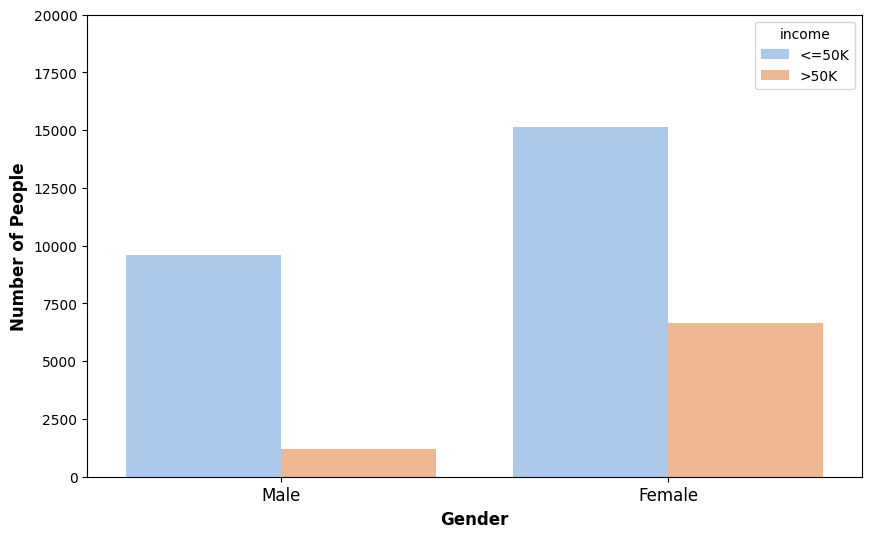

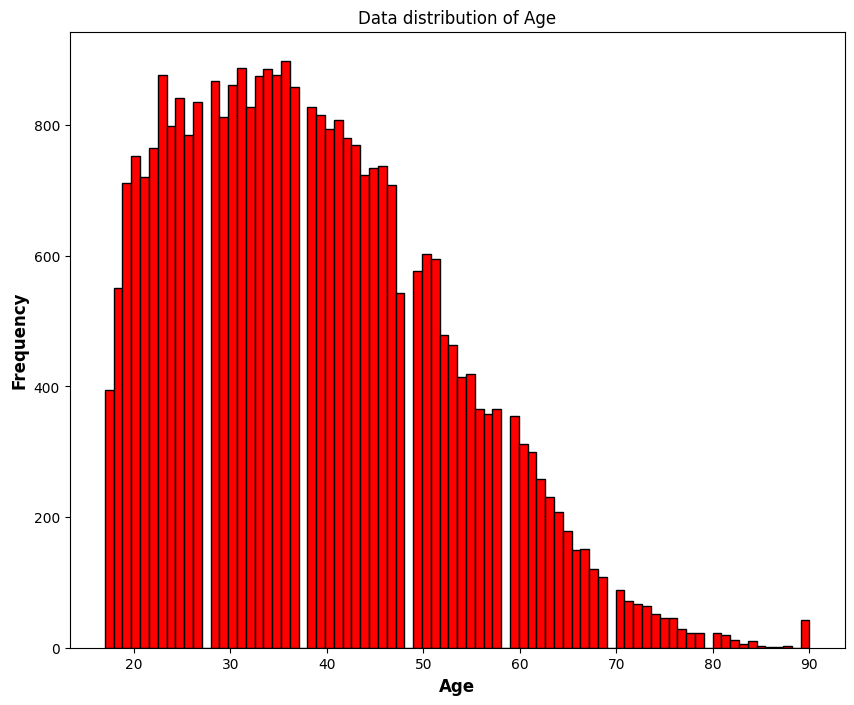

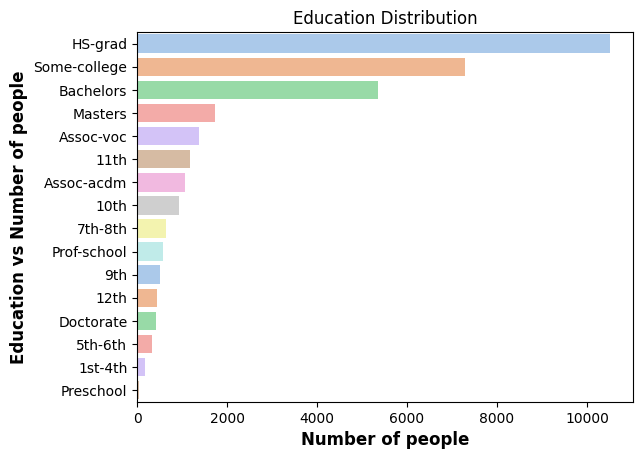

In [10]:
def plot_data(data):
    """
    Fungsi ini menerima DataFrame sebagai argumen dan menampilkan tiga plot
    berdasarkan data tersebut.

    Parameters:
    data (pd.DataFrame): DataFrame yang berisi data.

    Returns:
    None
    """
    # Plot 1: Countplot of 'sex' with hue "income"
    plt.figure(figsize=(10,6))
    sns.countplot(data = data, x = 'sex', hue="income", palette = 'pastel')
    plt.xlabel("Gender", fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.ylabel("Number of People", fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.ylim(0,20000)
    plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
    plt.show()

    # Plot 2: Histogram of 'age'
    plt.figure(figsize = (10,8))
    plt.hist(data['age'], bins=80, edgecolor='black', color='red')
    plt.title('Data distribution of Age')
    plt.xlabel('Age', fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.ylabel('Frequency',fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.show()

    # Plot 3: Barplot of 'education'
    edu_label_count = data['education'].value_counts()
    sns.barplot(x= edu_label_count.values, y=edu_label_count.index, palette = 'pastel')
    plt.title('Education Distribution')
    plt.xlabel('Number of people', fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.ylabel('Education vs Number of people', fontdict={'fontsize':12, 'color': 'black', 'fontweight':'bold'})
    plt.show()

plot_data(data)

### Data observations plot

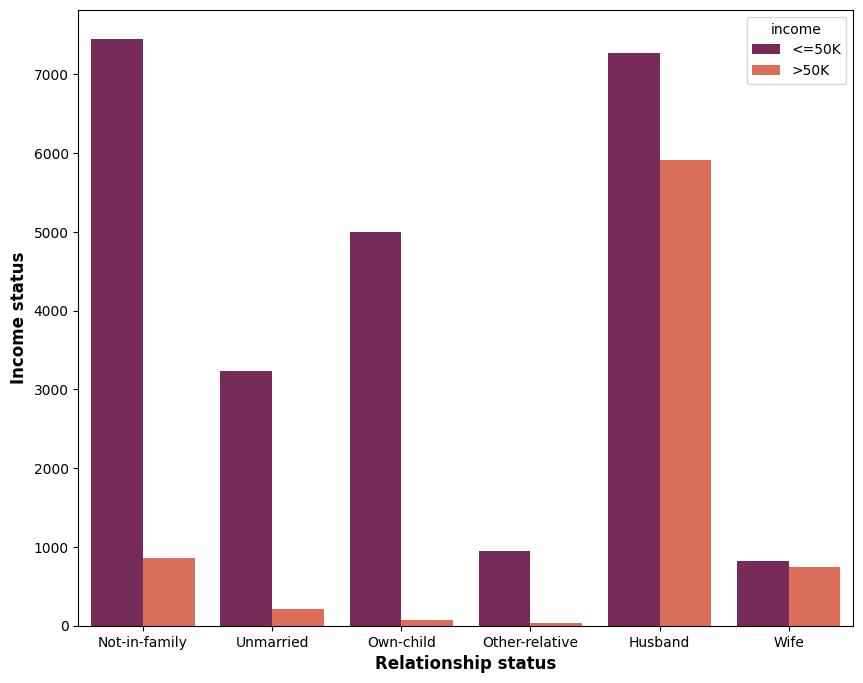

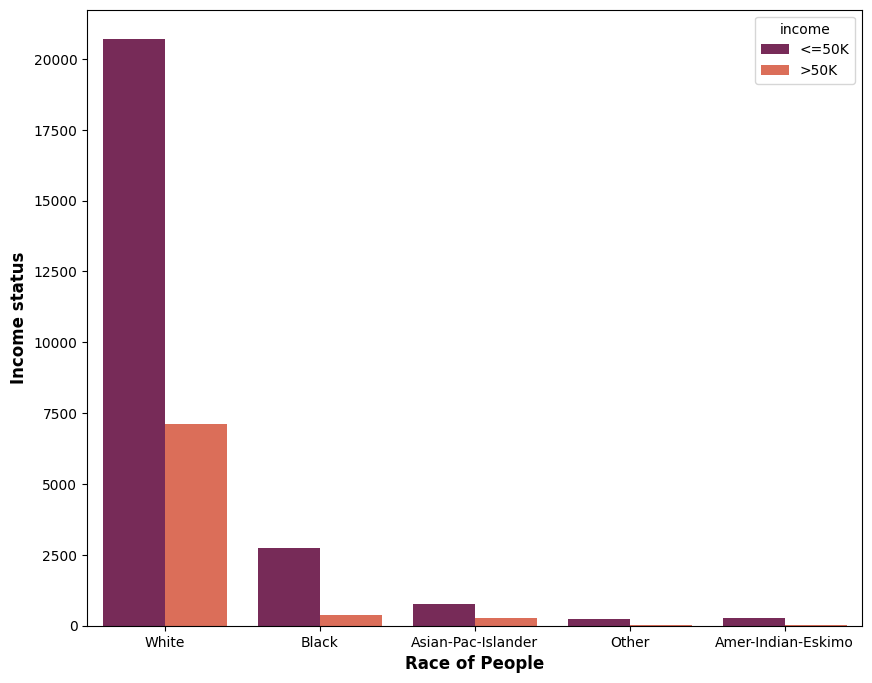

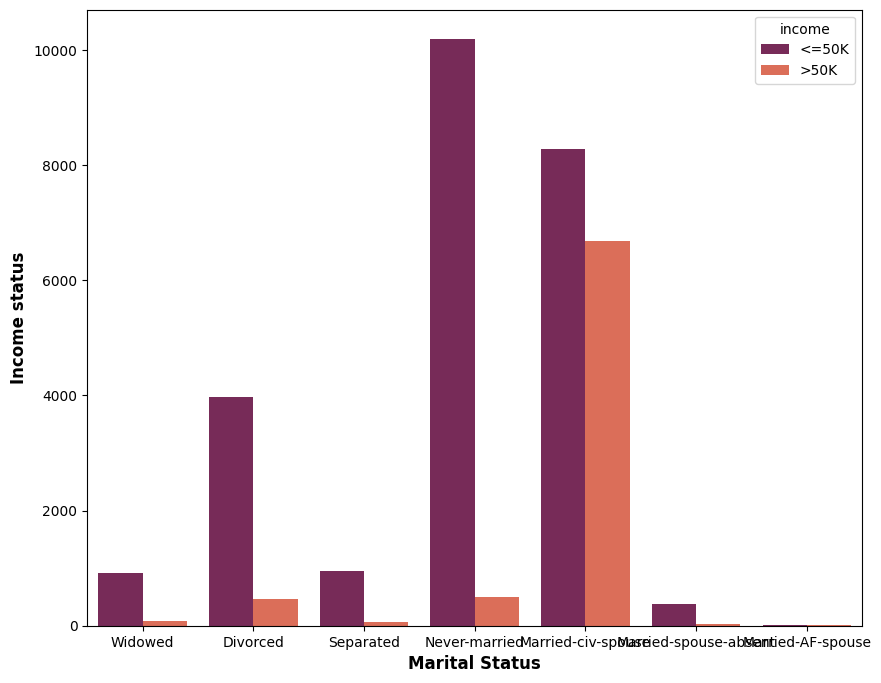

In [11]:
def plot_relationship_data(data, features, labels, palette, size):
    """
    Fungsi ini menerima DataFrame dan beberapa parameter lainnya sebagai argumen dan menampilkan plot berdasarkan data tersebut.

    Parameters:
    data (pd.DataFrame): DataFrame yang berisi data.
    features (list): Daftar fitur yang akan ditampilkan dalam plot.
    labels (list): Daftar label yang akan ditampilkan dalam plot.
    palette (str): Palet warna yang akan digunakan dalam plot.
    size (tuple): Ukuran plot.

    Returns:
    None
    """
    for feature, label in zip(features, labels):
        plt.figure(figsize = size)
        sns.countplot(data = data, x = feature, hue = 'income', palette = palette)
        plt.xlabel(label, fontdict = {'fontsize': 12, 'color': 'black', 'fontweight': 'bold'})
        plt.ylabel('Income status', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight': 'bold'})
        plt.show()

features = ['relationship', 'race', 'maritalStatus']
labels = ['Relationship status', 'Race of People', 'Marital Status']
palette = 'rocket'
size = (10, 8)

plot_relationship_data(data, features, labels, palette, size)


### Data proportion plot

In [12]:
def categorical_data(title, data, target):
    """
    Fungsi ini digunakan untuk membuat plot batang dari data kategorikal.

    Parameter:
    title (str): Nama kolom dalam dataframe yang akan digunakan sebagai sumbu x
    dalam plot.

    Output:
    Sebuah plot batang yang menunjukkan proporsi setiap kategori dalam kolom
    yang ditentukan.

    """
    plt.figure(figsize=(17,8))

    # calculate proportion values for each category
    prop_df = data.groupby([title, target]).size().reset_index(name='count')
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())

    g=sns.catplot(x=title, y='prop', kind='bar', hue=target, palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{0:.2f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()


<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

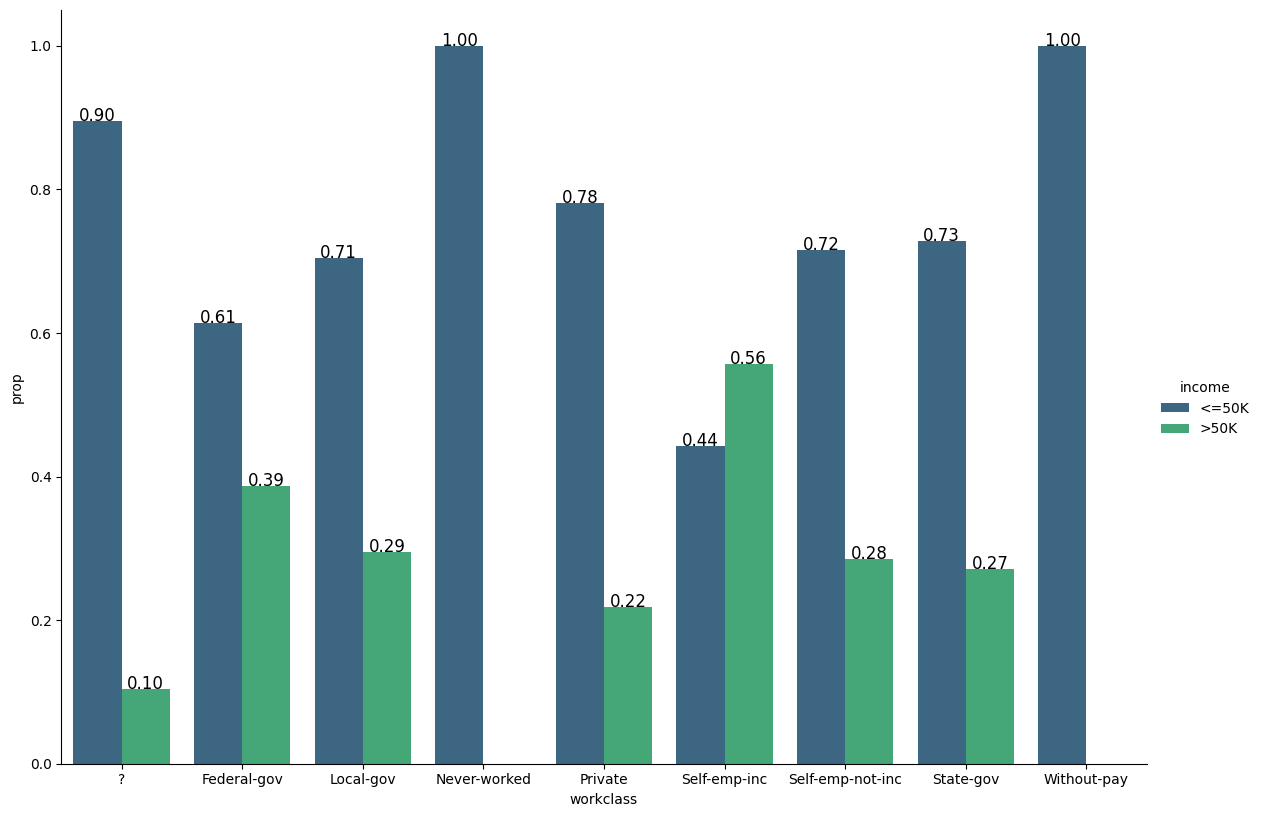

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

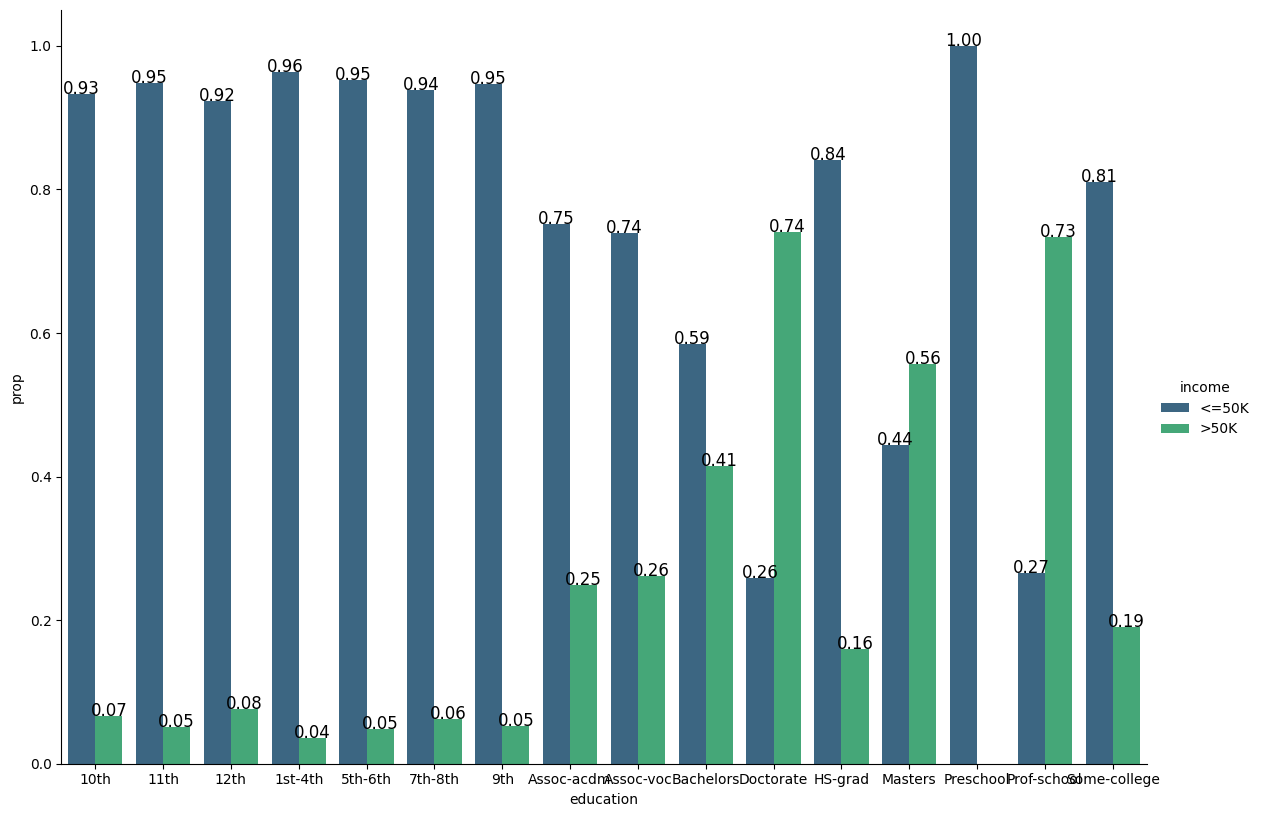

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

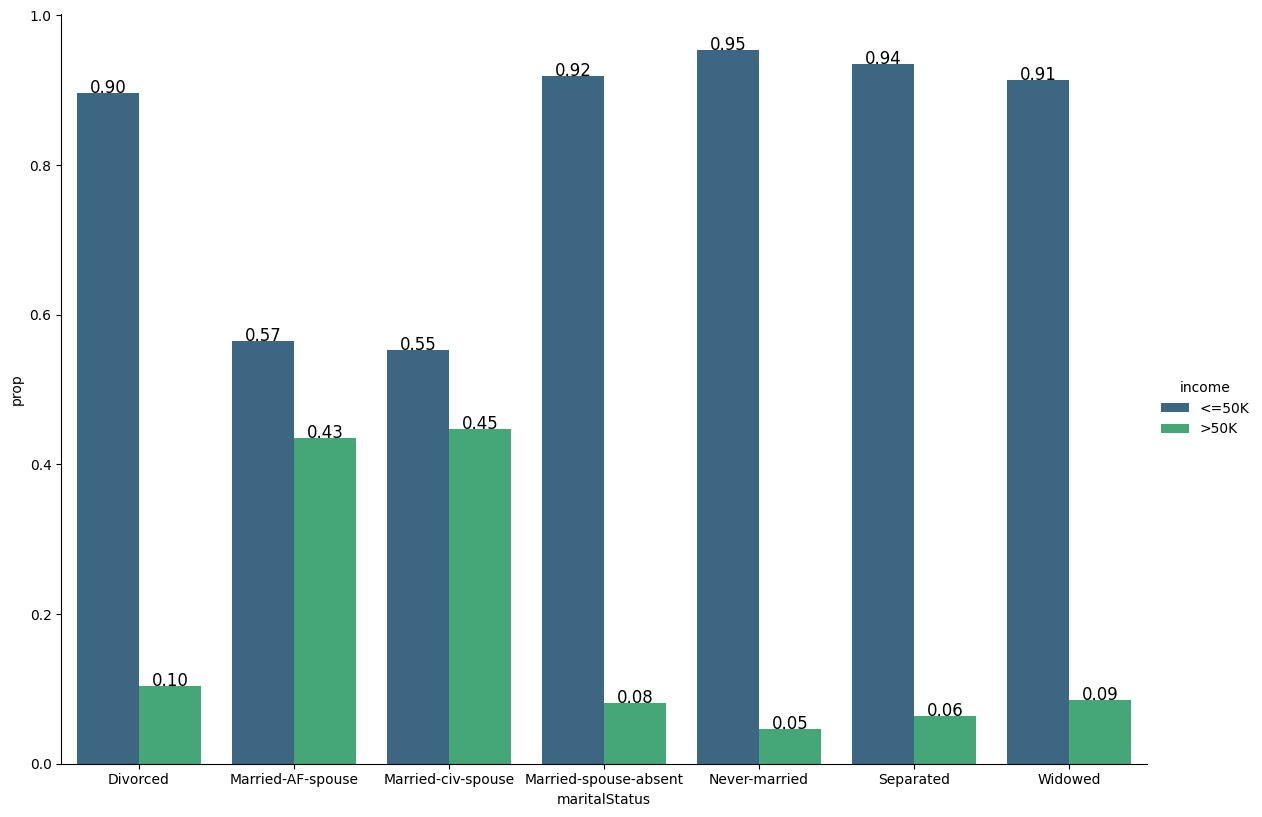

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

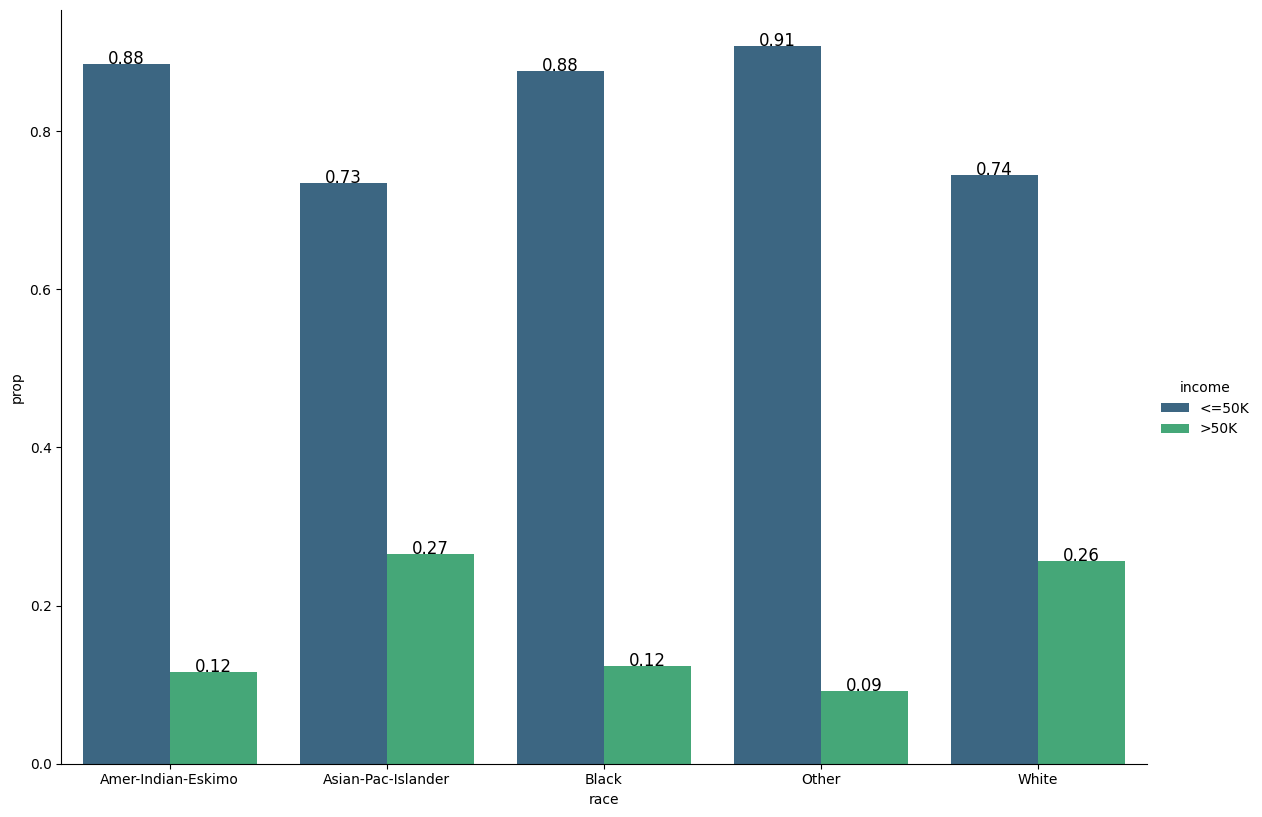

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

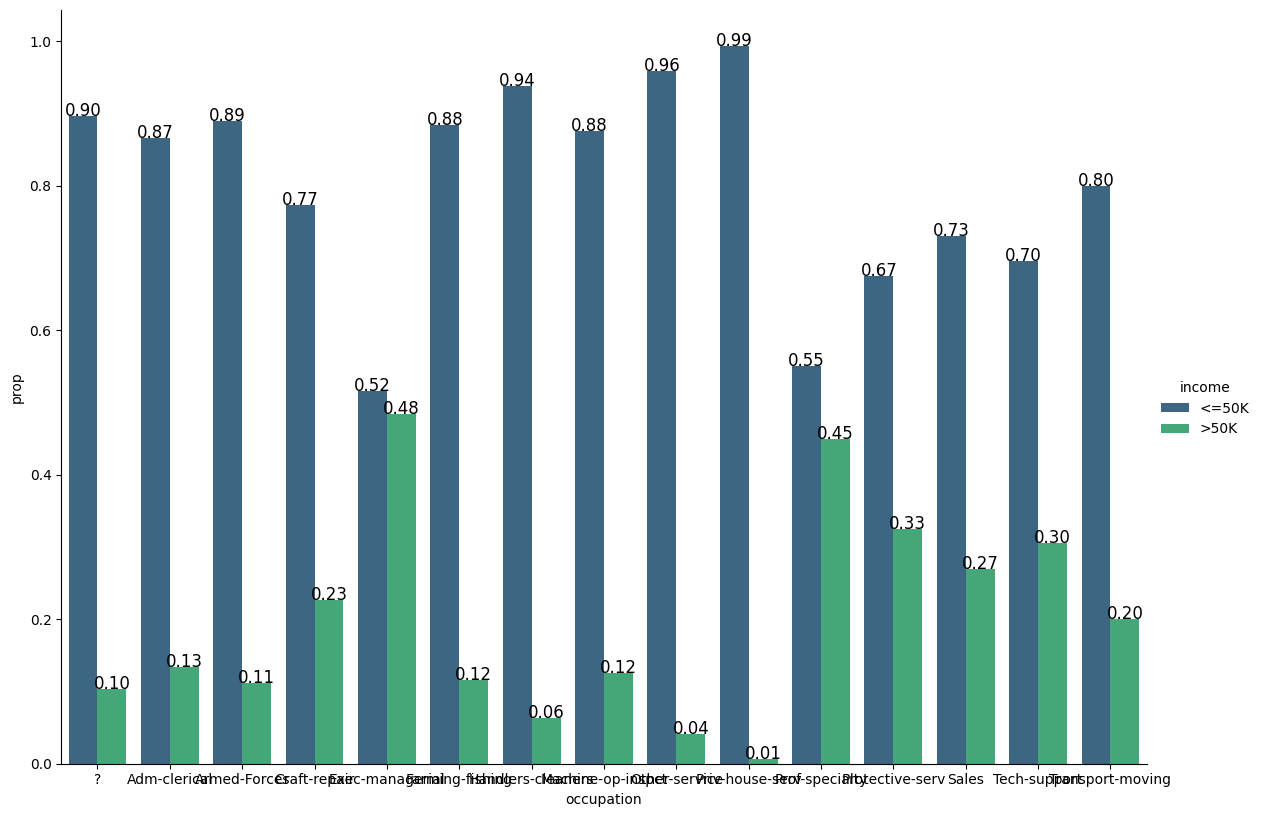

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

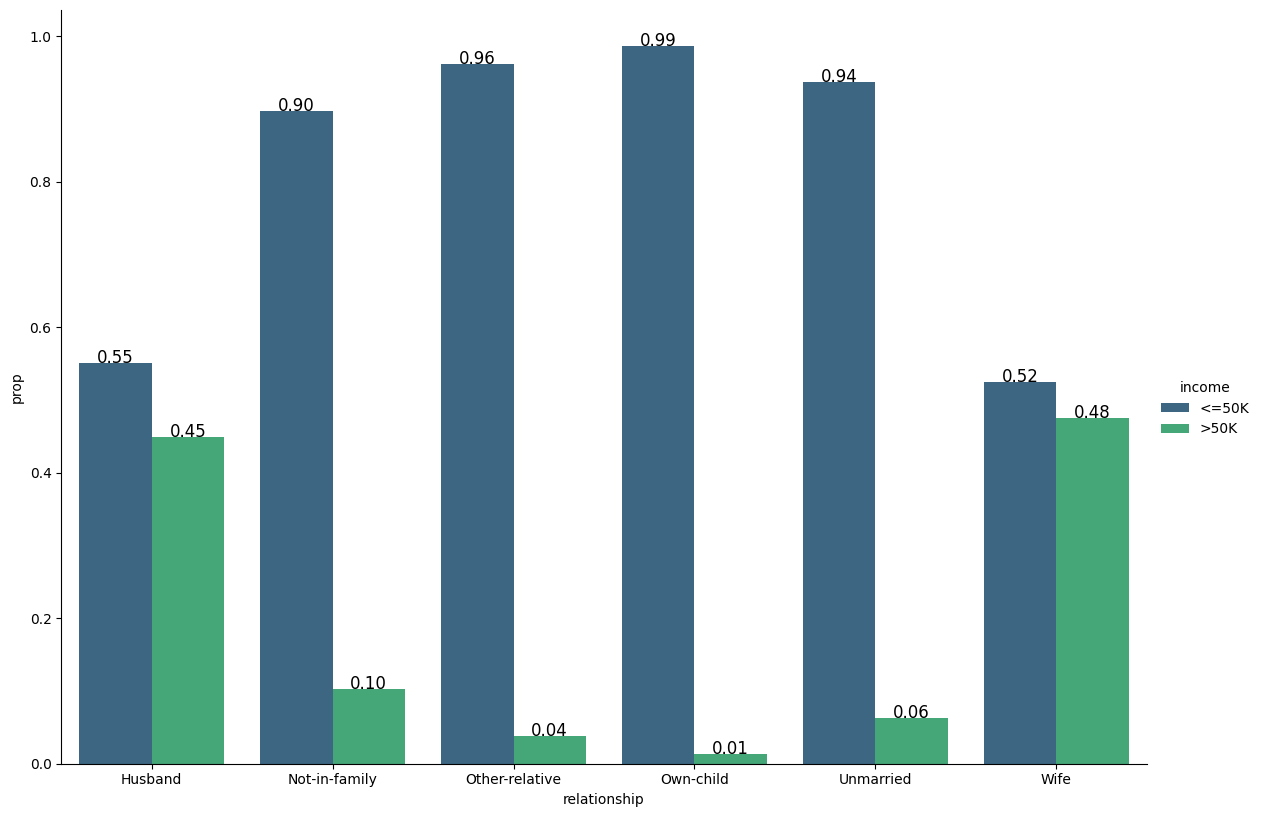

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

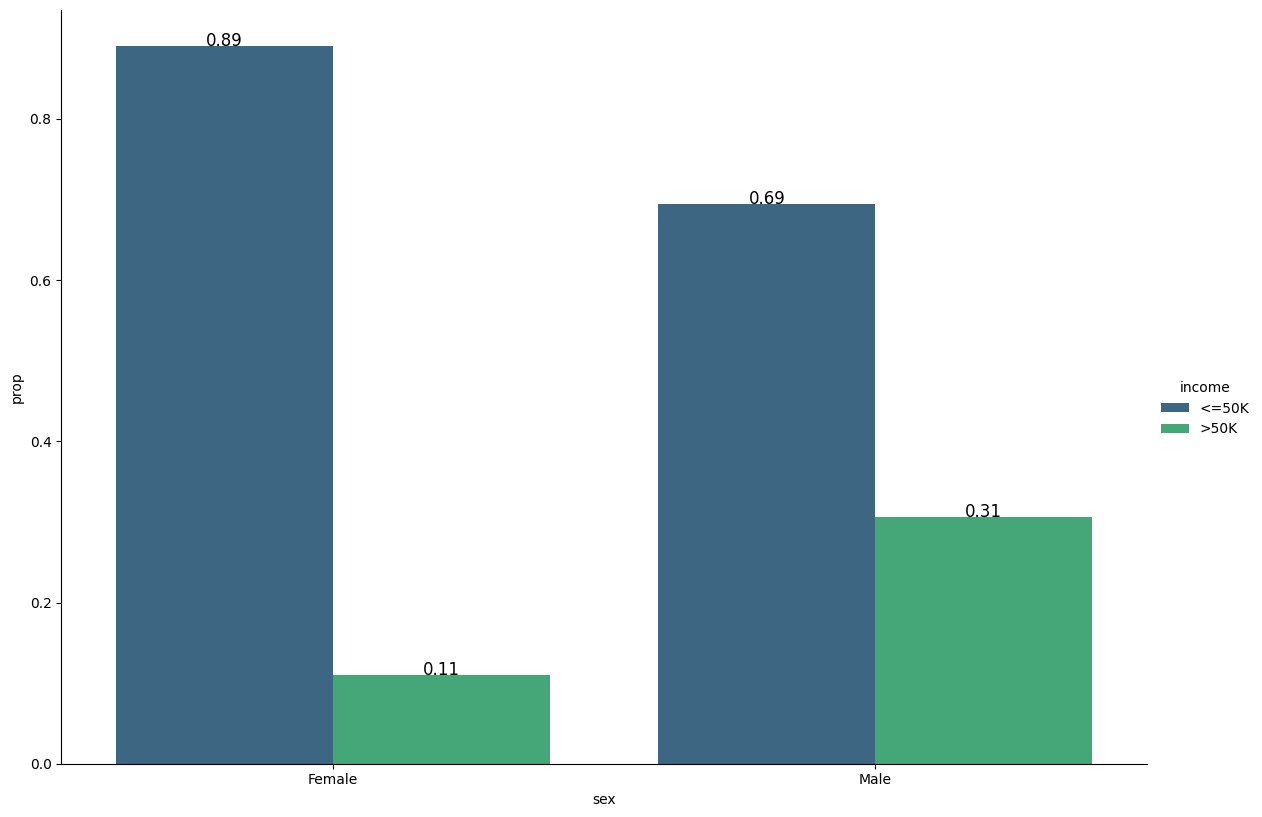

<ipython-input-12-242988f96ba7>:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())


<Figure size 1700x800 with 0 Axes>

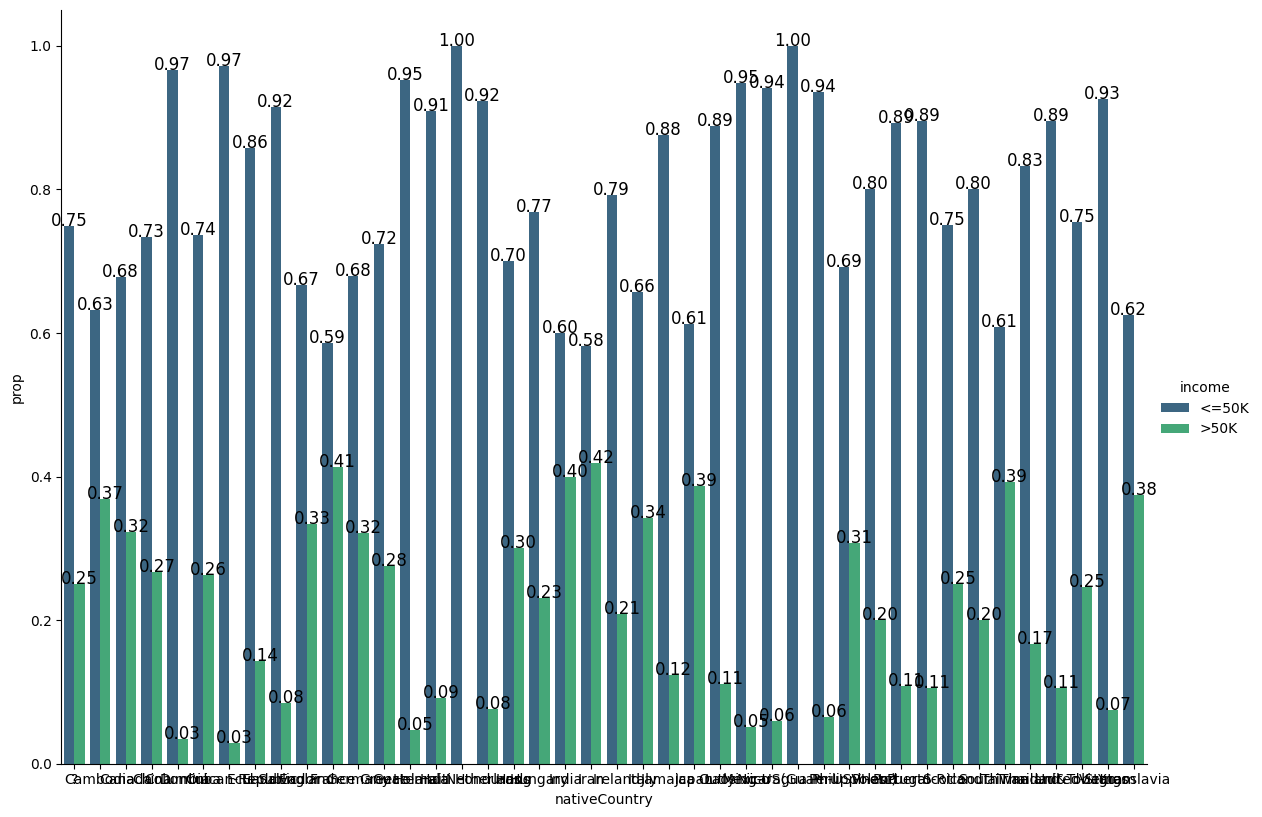

In [13]:
columns = ['workclass', 'education', 'maritalStatus',
           'race', 'occupation', 'relationship', 'sex',
           'nativeCountry']

for column in columns:
    categorical_data(column, data, 'income')

### Bivariate distribution plot

In [14]:
def dist_bivariate(title, data, target):
    """
    Fungsi ini digunakan untuk membuat plot distribusi bivariat.

    Parameter:
    title (str): Nama kolom dalam dataframe yang akan digunakan sebagai sumbu x dalam plot.

    Output:
    Sebuah plot distribusi yang menunjukkan distribusi data dalam kolom yang ditentukan

    """
    sns.FacetGrid(data,hue=target,palette='cubehelix').map(sns.distplot,title).add_legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


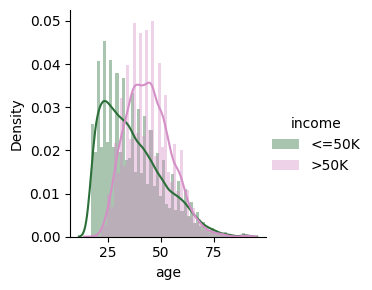

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


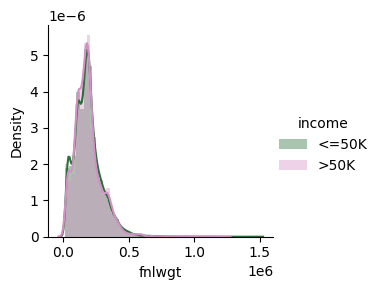

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


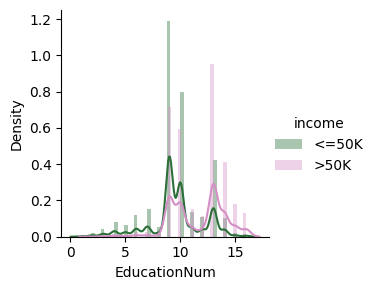

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


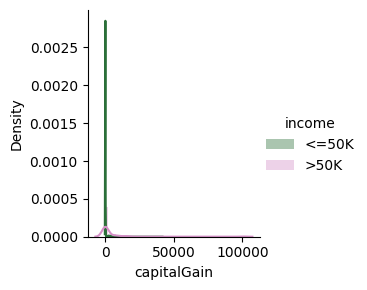

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


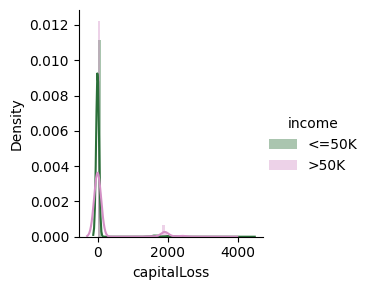

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


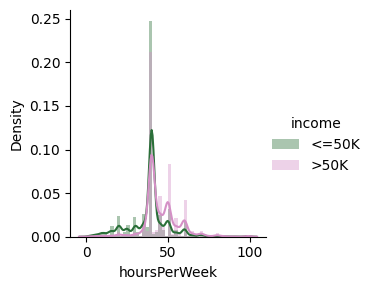

In [15]:
columns_numeric = ['age', 'fnlwgt', 'EducationNum',
                   'capitalGain', 'capitalLoss', 'hoursPerWeek']

for col in columns_numeric:
  dist_bivariate(col, data, 'income')

### Pair plot

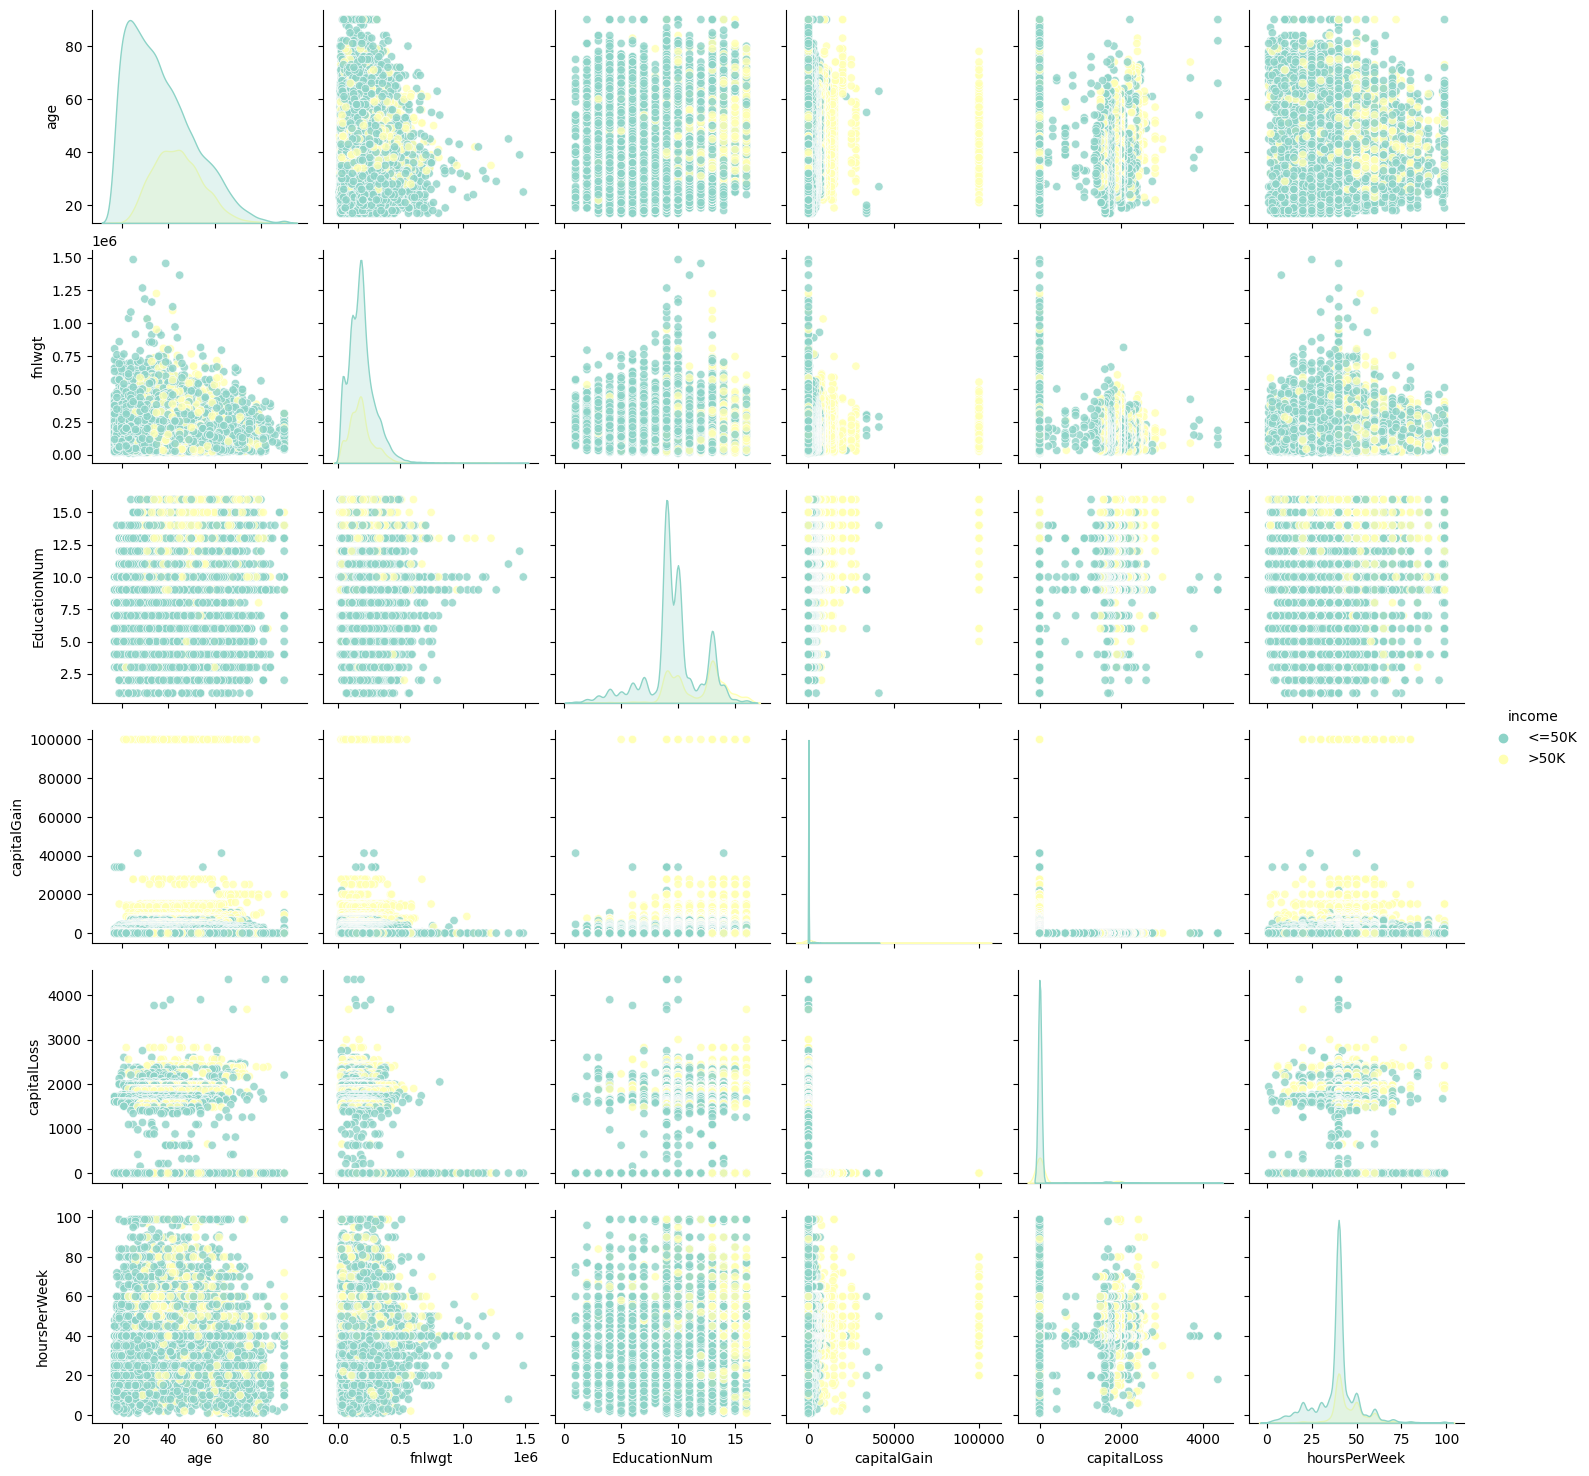

In [16]:
sns.pairplot(data, hue = 'income', palette = 'Set3',plot_kws = {'alpha': 0.8})
plt.show()

# Feature Engineering

## Data Splitting

In [17]:
train, test = train_test_split(data, test_size = 0.2, random_state=42)

## Duplicated Data

In [18]:
def drop_duplicates(data):
    """
    Fungsi ini digunakan untuk menghapus data duplikat dari dataframe.

    Parameter:
    data (DataFrame): DataFrame yang akan diperiksa dan dibersihkan dari data duplikat.

    Output:
    DataFrame yang telah dibersihkan dari data duplikat.

    Catatan:
    Fungsi ini mengasumsikan bahwa Anda telah mengimpor library pandas sebagai pd.
    """
    print("Before drop duplicated data")
    print(data.shape)

    data = data.drop_duplicates(keep='first')

    print("After drop duplicated data")
    print(data.shape)

    # Check again for duplicated data
    print("Duplicated data:")
    print(data[data.duplicated(keep=False)])

    return data


In [19]:
train = drop_duplicates(train)
test = drop_duplicates(test)

Before drop duplicated data
(26048, 15)
After drop duplicated data
(26036, 15)
Duplicated data:
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, EducationNum, maritalStatus, occupation, relationship, race, sex, capitalGain, capitalLoss, hoursPerWeek, nativeCountry, income]
Index: []
Before drop duplicated data
(6513, 15)
After drop duplicated data
(6512, 15)
Duplicated data:
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, EducationNum, maritalStatus, occupation, relationship, race, sex, capitalGain, capitalLoss, hoursPerWeek, nativeCountry, income]
Index: []


## Missing Value Handling

In [20]:
def display_null_values(train, test):
  """
  Fungsi untuk menampikan null values
  """
  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_null_values(train, test)

Missing values in train data:

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64


Missing values in test data:

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64


In [21]:
def display_isin_values(train, test, isin):
  """
  Fungsi untuk menampilkan missing values
  """
  print("Missing values in train data:\n")
  print(train.isin([isin]).sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isin([isin]).sum())

display_isin_values(train, test, '?')

Missing values in train data:

age                 0
workclass        1436
fnlwgt              0
education           0
EducationNum        0
maritalStatus       0
occupation       1442
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     473
income              0
dtype: int64


Missing values in test data:

age                0
workclass        400
fnlwgt             0
education          0
EducationNum       0
maritalStatus      0
occupation       401
relationship       0
race               0
sex                0
capitalGain        0
capitalLoss        0
hoursPerWeek       0
nativeCountry    109
income             0
dtype: int64


In [22]:
def calculate_missing_values(df, column, missing_values):
    """
    Fungsi ini mengambil DataFrame, nama kolom, dan nilai-nilai yang hilang sebagai argumen,
    dan menghitung persentase missing value pada kolom tersebut.

    Parameters:
    df (pd.DataFrame): DataFrame yang berisi data.
    column (str): Nama kolom dalam DataFrame.
    missing_values (list): Daftar nilai yang dianggap sebagai missing values.

    Returns:
    missing_percentage (float): Persentase missing value pada kolom.

    Notes:
    untuk data numerik, masih bisa menggunakan isin dengan memasukan nilai [-1],
    ini kurang lebih sama dengan == -1
    """

    # Cek missing value
    display(df[column].value_counts())

    # Menghitung missing count dan total count
    missing_count = len(df[df[column].isin(missing_values)])
    total_count = len(df)

    # Menghitung presentase missing
    missing_percentage = (missing_count / total_count) * 100

    return missing_percentage

In [23]:
columns_missing = ['workclass', 'occupation', 'nativeCountry']

for col in columns_missing:
  missing_values = calculate_missing_values(data, col, ['?'])
  print(missing_values)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

5.638647461687294


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

5.660145572924664


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

1.7904855501980899


In [24]:
print("Name of labels in Workclass:\n")
print(data.workclass.unique())
print("Name of labels in Occupation:\n")
print(data.occupation.unique())
print("Name of labels in Native Country:\n")
print(data.nativeCountry.unique())

Name of labels in Workclass:

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Name of labels in Occupation:

['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Name of labels in Native Country:

['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']


In [25]:
data.workclass.value_counts()
print("Name of values in particular labels in Workclass:\n")
print(data.workclass.value_counts())
print("Name of values in particular labels in Occupation:\n")
print(data.workclass.value_counts())
print("Name of values in particular labels in Native Country:\n")
print(data.workclass.value_counts())

Name of values in particular labels in Workclass:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Name of values in particular labels in Occupation:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Name of values in particular labels in Native Country:

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [26]:
def handle_missing_values(train, test, column, missing_values, data_type):
    """
    Fungsi ini mengambil dua DataFrame (train dan test), nama kolom,
    nilai-nilai yang hilang, dan tipe data sebagai argumen,
    dan mengganti missing value dengan median (untuk data numerik)
    atau modus (untuk data kategorikal).

    Parameters:
    train (pd.DataFrame): DataFrame yang berisi data train.
    test (pd.DataFrame): DataFrame yang berisi data test.
    column (str): Nama kolom dalam DataFrame.
    missing_values (list): Daftar nilai yang dianggap sebagai missing values.
    data_type (str): Tipe data kolom ('numeric' atau 'categorical').

    Returns:
    None
    """
    # Jika data numerik menggunakan median
    if data_type == 'numeric':
      median = train[~train[column].isin(missing_values)][column].median()
      print(f"Median dari train adalah:", median)
      train[column] = train[column].apply(lambda x: median if x in missing_values else x)
      test[column] = test[column].apply(lambda x: median if x in missing_values else x)
      print("Value counts dari train:")
      display(train[column].value_counts())
      print("Value counts dari test:")
      display(test[column].value_counts())
      print()
    # Jika data kategorikal menggunakan modus
    elif data_type == 'categorical':
      mode = train[~train[column].isin(missing_values)][column].mode()[0]
      print(f"Modus dari train adalah:", mode)
      train[column] = train[column].apply(lambda x: mode if x in missing_values else x)
      test[column] = test[column].apply(lambda x: mode if x in missing_values else x)
      print("Value counts dari train:")
      display(train[column].value_counts())
      print("Value counts dari test:")
      display(test[column].value_counts())
      print()

In [27]:
handling_missing = ['workclass', 'occupation', 'nativeCountry']

for col in handling_missing:
  handling_missing_values = handle_missing_values(train, test, col, ['?'], 'categorical')
  print(handling_missing_values)

Modus dari train adalah: Private
Value counts dari train:


Private             19577
Self-emp-not-inc     2032
Local-gov            1680
State-gov            1062
Self-emp-inc          901
Federal-gov           766
Without-pay            12
Never-worked            6
Name: workclass, dtype: int64

Value counts dari test:


Private             4942
Self-emp-not-inc     509
Local-gov            413
State-gov            236
Self-emp-inc         215
Federal-gov          194
Without-pay            2
Never-worked           1
Name: workclass, dtype: int64


None
Modus dari train adalah: Prof-specialty
Value counts dari train:


Prof-specialty       4776
Craft-repair         3303
Exec-managerial      3251
Adm-clerical         3049
Sales                2906
Other-service        2613
Machine-op-inspct    1599
Transport-moving     1270
Handlers-cleaners    1088
Farming-fishing       784
Tech-support          754
Protective-serv       517
Priv-house-serv       119
Armed-Forces            7
Name: occupation, dtype: int64

Value counts dari test:


Prof-specialty       1205
Exec-managerial       814
Craft-repair          795
Sales                 744
Adm-clerical          719
Other-service         680
Machine-op-inspct     401
Transport-moving      327
Handlers-cleaners     282
Farming-fishing       209
Tech-support          173
Protective-serv       132
Priv-house-serv        29
Armed-Forces            2
Name: occupation, dtype: int64


None
Modus dari train adalah: United-States
Value counts dari train:


United-States                 23779
Mexico                          511
Philippines                     165
Germany                         115
Canada                           97
El-Salvador                      92
Puerto-Rico                      85
India                            82
England                          74
Cuba                             70
South                            63
China                            63
Jamaica                          62
Italy                            60
Dominican-Republic               56
Columbia                         53
Vietnam                          53
Guatemala                        51
Japan                            44
Poland                           44
Taiwan                           41
Haiti                            36
Iran                             34
Portugal                         31
Nicaragua                        29
Greece                           28
Peru                             27
France                      

Value counts dari test:


United-States                 5963
Mexico                         131
Philippines                     33
Puerto-Rico                     29
Cuba                            25
Canada                          24
Germany                         22
Jamaica                         19
Japan                           18
India                           18
South                           17
Poland                          16
England                         16
Vietnam                         14
El-Salvador                     14
Dominican-Republic              14
Italy                           13
China                           12
Guatemala                       12
Taiwan                          10
Ecuador                          9
Ireland                          9
Iran                             9
Haiti                            8
Trinadad&Tobago                  7
Columbia                         6
Honduras                         6
Portugal                         6
Nicaragua           


None


In [28]:
train.isna().sum()

age              0
workclass        0
fnlwgt           0
education        0
EducationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64

## Encoding

In [29]:
def encode_categorical_columns(train, test):
    """
    Fungsi ini menerima dua DataFrame (train dan test) sebagai argumen dan
    mengembalikan dua DataFrame yang sudah di-encode.

    Parameters:
    train (pd.DataFrame): DataFrame yang berisi data latihan.
    test (pd.DataFrame): DataFrame yang berisi data tes.

    Returns:
    train (pd.DataFrame): DataFrame data latihan yang sudah di-encode.
    test (pd.DataFrame): DataFrame data tes yang sudah di-encode.
    """
    le = LabelEncoder()
    for col in train.columns:
        if train[col].dtype == 'object':
            # Fit dan transform kolom pada data train
            train[col] = le.fit_transform(train[col].astype(str))
            # Transform kolom pada data test
            test[col] = le.transform(test[col].astype(str))
    return train, test

train, test = encode_categorical_columns(train, test)

In [30]:
train.dtypes

age              int64
workclass        int64
fnlwgt           int64
education        int64
EducationNum     int64
maritalStatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalGain      int64
capitalLoss      int64
hoursPerWeek     int64
nativeCountry    int64
income           int64
dtype: object

In [31]:
test.dtypes

age              int64
workclass        int64
fnlwgt           int64
education        int64
EducationNum     int64
maritalStatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalGain      int64
capitalLoss      int64
hoursPerWeek     int64
nativeCountry    int64
income           int64
dtype: object

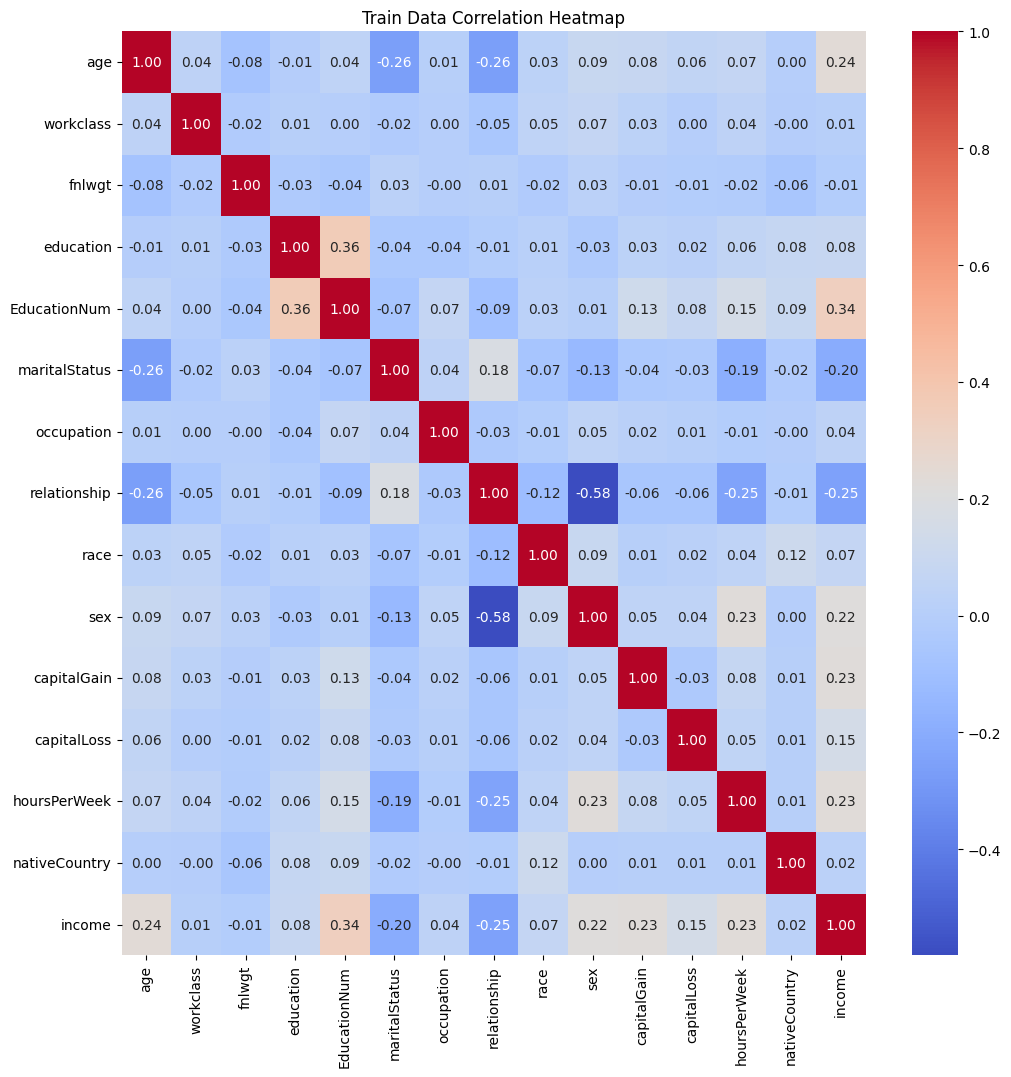

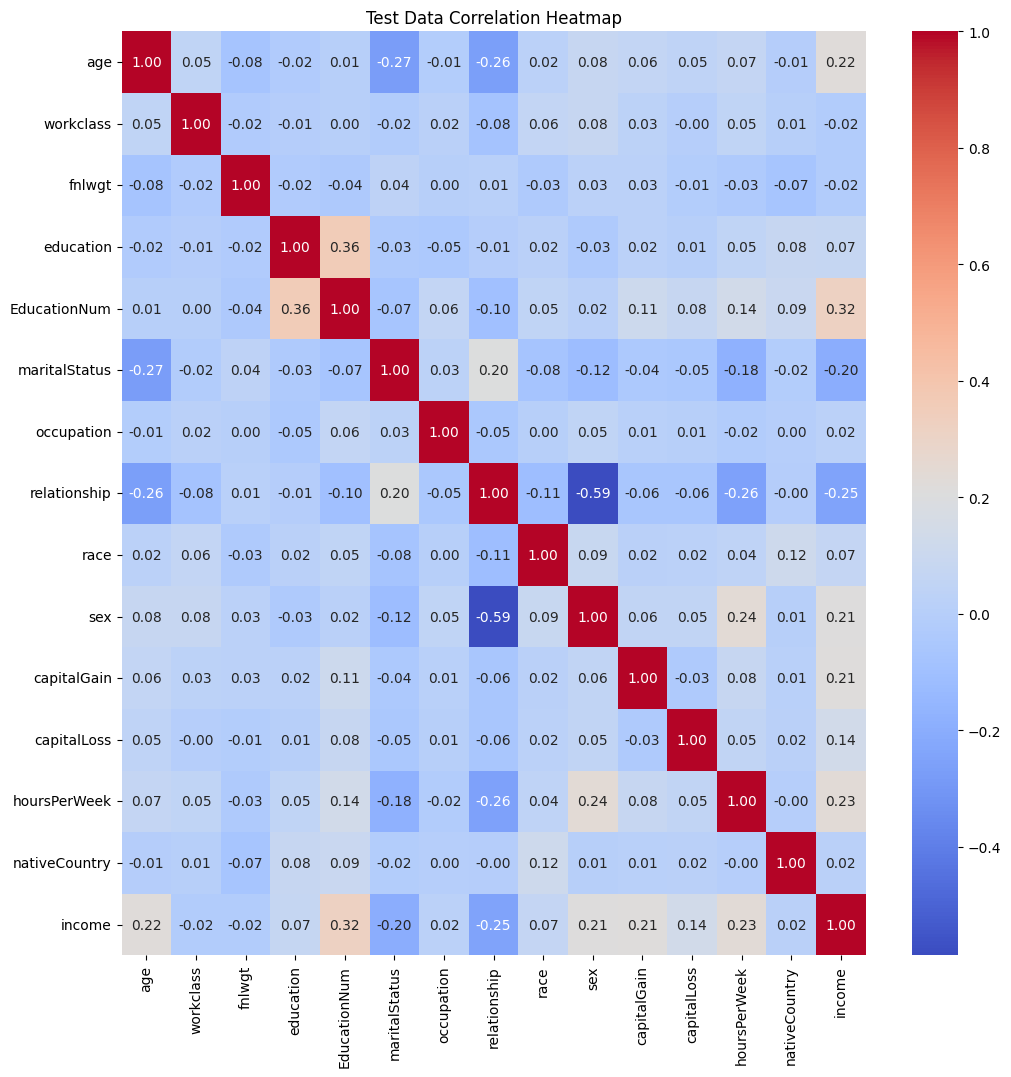

In [32]:
def plot_heatmap(train, test):
    """
    Fungsi ini digunakan untuk membuat Heatmap Korelasi untuk dua dataset yang diberikan.

    Parameters:
    train (DataFrame): DataFrame pertama yang akan digunakan untuk membuat heatmap korelasi.
    test (DataFrame): DataFrame kedua yang akan digunakan untuk membuat heatmap korelasi.

    Returns:
    None: Fungsi ini tidak mengembalikan apa pun, tetapi menampilkan Heatmap Korelasi
    untuk dua dataset yang diberikan.
    """
    for df, name in zip([train, test], ['Train', 'Test']):
        plt.figure(figsize= (12,12))
        sns.heatmap(df.corr(), annot = True, fmt = '0.2f', cmap = 'coolwarm', linecolor = 'black')
        plt.title(f'{name} Data Correlation Heatmap')
        plt.show()

plot_heatmap(train, test)

In [33]:
def display_basic_stats(train, test):
    """
    Fungsi ini digunakan untuk menampilkan statistik dasar dari dua dataset yang
    diberikan.

    Parameters:
    train (DataFrame): DataFrame pertama yang akan digunakan untuk menampilkan
    statistik dasar.
    test (DataFrame): DataFrame kedua yang akan digunakan untuk menampilkan
    statistik dasar.

    Returns:
    None: Fungsi ini tidak mengembalikan apa pun, tetapi mencetak statistik
    dasar untuk dua dataset yang diberikan.
    """
    for df, name in zip([train, test], ['Train', 'Test']):
        print(f"Basic Stats of {name} Data after Label Encoding:\n\n")
        print(df.describe())
        print("\n")

display_basic_stats(train, test)


Basic Stats of Train Data after Label Encoding:


                age     workclass        fnlwgt     education  EducationNum  \
count  26036.000000  26036.000000  2.603600e+04  26036.000000  26036.000000   
mean      38.528806      3.097365  1.898360e+05     10.281188     10.088570   
std       13.583980      1.111287  1.050396e+05      3.868545      2.580613   
min       17.000000      0.000000  1.228500e+04      0.000000      1.000000   
25%       28.000000      3.000000  1.179630e+05      9.000000      9.000000   
50%       37.000000      3.000000  1.785135e+05     11.000000     10.000000   
75%       47.000000      3.000000  2.374528e+05     12.000000     13.000000   
max       90.000000      7.000000  1.455435e+06     15.000000     16.000000   

       maritalStatus    occupation  relationship          race           sex  \
count   26036.000000  26036.000000  26036.000000  26036.000000  26036.000000   
mean        2.606737      6.124481      1.446843      3.665617      0.669227  

## Data Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_features(train, test, target_column):
    """
    Fungsi ini digunakan untuk menskalakan fitur dalam dua DataFrame yang
    diberikan menggunakan StandardScaler dari sklearn.preprocessing.

    Parameters:
    train (DataFrame): DataFrame pertama yang fiturnya akan diskalakan.
    test (DataFrame): DataFrame kedua yang fiturnya akan diskalakan.
    target_column (str): Nama kolom target yang tidak akan diskalakan.

    Returns:
    train_scaled (DataFrame): DataFrame pertama dengan fitur yang telah diskalakan.
    test_scaled (DataFrame): DataFrame kedua dengan fitur yang telah diskalakan.
    """
    scaler = StandardScaler()

    # Fit dan transform fitur pada data train
    train_features = scaler.fit_transform(train.drop(target_column, axis=1))
    train_scaled = pd.DataFrame(train_features, columns=train.columns[:-1])

    # Transform fitur pada data test
    test_features = scaler.transform(test.drop(target_column, axis=1))
    test_scaled = pd.DataFrame(test_features, columns=test.columns[:-1])

    return train_scaled, test_scaled

train_scaled, test_scaled = scale_features(train, test, 'income')

In [35]:
train_scaled.head()

age  workclass    fnlwgt  education  EducationNum  maritalStatus  \
0 -0.922340  -0.087616  0.632411   0.185813     -0.421834       0.924283   
1 -1.069575  -0.087616 -0.186210   0.185813     -0.421834       0.924283   
2 -0.186165  -0.087616 -1.085421  -0.331187      1.128215      -1.729294   
3 -1.216810   2.612007 -1.575065   1.219813     -0.034322      -0.402506   
4 -0.554252  -1.887365  1.588507  -0.331187      1.128215      -0.402506   

   occupation  relationship      race       sex  capitalGain  capitalLoss  \
0   -1.036535     -0.278050  0.393896  0.703037    -0.147201    -0.217732   
1    0.220029     -0.278050  0.393896 -1.422401    -0.147201    -0.217732   
2   -1.539160      1.588716  0.393896 -1.422401    -0.147201    -0.217732   
3   -1.539160      2.210971  0.393896 -1.422401    -0.147201    -0.217732   
4    0.722654     -0.900306  0.393896  0.703037    -0.147201    -0.217732   

   hoursPerWeek  nativeCountry  
0     -1.258640       0.262319  
1     -0.447739       0.262319  
2     -0.042289       0.262319  
3     -1.664090       0.262319  
4     -0.042289       0.262319

In [36]:
test_scaled.head()

age  workclass    fnlwgt  education  EducationNum  maritalStatus  \
0 -0.701487  -0.087616  0.864281   1.219813     -0.034322      -0.402506   
1 -1.437663  -0.087616  2.379558   1.219813     -0.034322       0.924283   
2 -0.775105  -0.087616  0.141835   1.219813     -0.034322      -0.402506   
3 -0.259782  -0.087616 -0.779198  -2.399188     -1.196859       0.924283   
4 -1.364045  -0.087616 -1.291767   1.219813     -0.034322       0.924283   

   occupation  relationship      race       sex  capitalGain  capitalLoss  \
0   -0.282596     -0.900306  0.393896  0.703037    -0.147201    -0.217732   
1    1.225280      0.966460  0.393896  0.703037    -0.147201    -0.217732   
2    1.476592      2.210971  0.393896 -1.422401    -0.147201    -0.217732   
3    1.225280     -0.278050  0.393896  0.703037    -0.147201    -0.217732   
4   -1.539160      0.966460  0.393896 -1.422401    -0.147201    -0.217732   

   hoursPerWeek  nativeCountry  
0     -0.042289       0.262319  
1     -2.069540       0.262319  
2     -0.042289       0.262319  
3      0.363161       0.262319  
4     -0.853189       0.262319

In [37]:
X_train = train_scaled
y_train = train['income']
X_test = test_scaled
y_test = test['income']

# Modelling

## RandomForestRegressor

In [38]:
rf_reg = RandomForestRegressor(n_estimators = 5, random_state = 42)
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test).round()

In [39]:
mse = mean_squared_error(y_test, pred_rf)
print(f"Mean Squared Error: {mse:.2f}")
Accuracy_rf = 100*accuracy_score(y_test, pred_rf)
print(f"Accuracy: {Accuracy_rf}")

Mean Squared Error: 0.16
Accuracy: 83.89127764127764


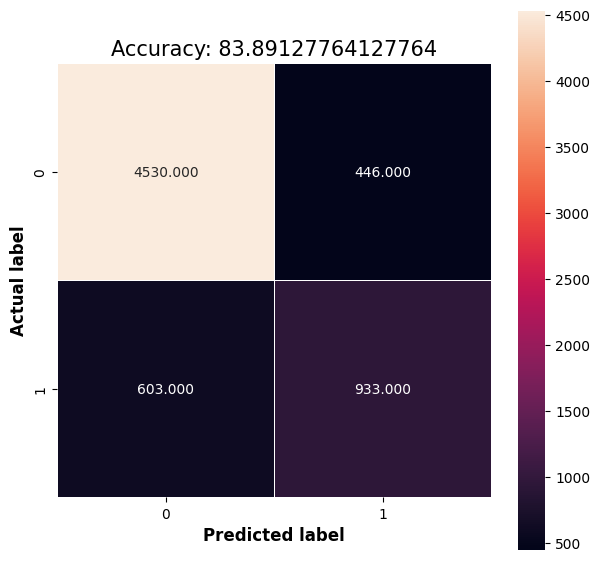



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4976
           1       0.68      0.61      0.64      1536

    accuracy                           0.84      6512
   macro avg       0.78      0.76      0.77      6512
weighted avg       0.83      0.84      0.84      6512


R-2 Score:

0.10624539456055715


In [41]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
plt.xlabel('Predicted label',fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
all_sample_title = f'Accuracy: {Accuracy_rf}'
plt.title(all_sample_title, size = 15)
plt.show()
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_rf))
print('\nR-2 Score:\n')
print(r2_score(y_test,pred_rf))

## Linear Regression

In [42]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred_lr = lr_reg.predict(X_test).round()

In [43]:
mse = mean_squared_error(y_test, pred_lr)
print(f"Mean Squared Error: {mse:.2f}")
Accuracy_lr = 100*accuracy_score(y_test, pred_lr)
print(f"The Accuracy using Linear Regression is {Accuracy_lr}")

Mean Squared Error: 0.19
The Accuracy using Linear Regression is 80.82002457002457


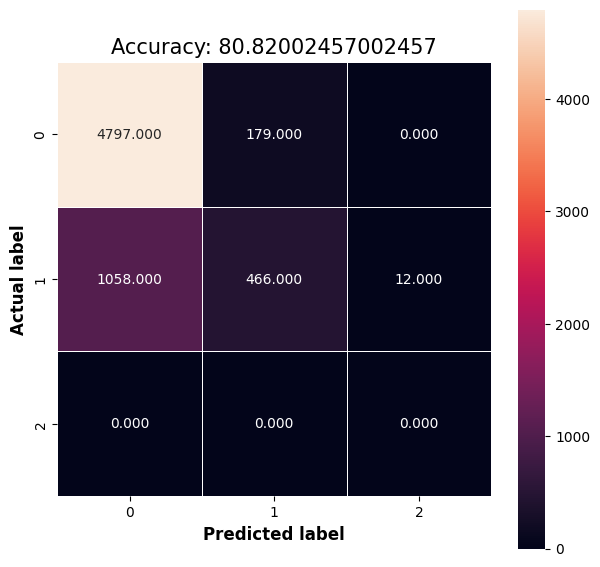



Claasifiation Report:

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      4976
         1.0       0.72      0.30      0.43      1536
         2.0       0.00      0.00      0.00         0

    accuracy                           0.81      6512
   macro avg       0.51      0.42      0.44      6512
weighted avg       0.80      0.81      0.78      6512


R-2 Score:

-0.06415586481779223


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
plt.figure(figsize=(7,7))
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
plt.xlabel('Predicted label',fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
all_sample_title = f'Accuracy: {Accuracy_lr}'
plt.title(all_sample_title, size = 15)
plt.show()
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_lr))
print('\nR-2 Score:\n')
print(r2_score(y_test,pred_lr))

## GradientBoostingRegressor

In [45]:
gb_reg = GradientBoostingRegressor(n_estimators=20,learning_rate=0.05,max_depth=2,random_state=42)
gb_reg.fit(X_train, y_train)
pred_gb= gb_reg.predict(X_test).round()

In [46]:
mse = mean_squared_error(y_test, pred_gb)
print(f"Mean Squared Error: {mse:.2f}")
Accuracy_gb = 100*accuracy_score(y_test, pred_gb)
print(f"The Accuracy: {Accuracy_gb}")

Mean Squared Error: 0.19
The Accuracy: 81.44963144963145


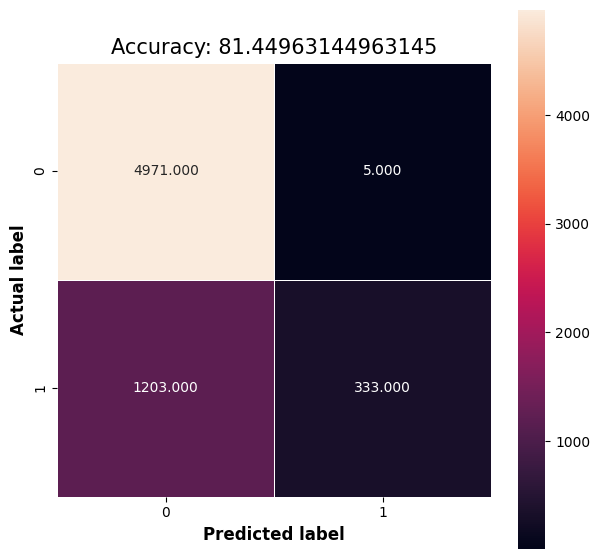



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4976
           1       0.99      0.22      0.36      1536

    accuracy                           0.81      6512
   macro avg       0.90      0.61      0.62      6512
weighted avg       0.85      0.81      0.77      6512


R-2 Score:

-0.029223606645230715


In [47]:
plt.figure(figsize=(7,7))
cm_gb = confusion_matrix(y_test, pred_gb)
sns.heatmap(cm_gb, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label', fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
plt.xlabel('Predicted label',fontdict = {'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
all_sample_title = f'Accuracy: {Accuracy_gb}'
plt.title(all_sample_title, size = 15)
plt.show()
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_gb))
print('\nR-2 Score:\n')
print(r2_score(y_test,pred_gb))

## Learning Curve

In [ ]:
# X = pd.concat([X_train, X_test], axis=0)
# y = pd.concat([y_train, y_test], axis=0)

In [48]:
def plot_learning_curve(model, X, y, cv, scoring, title):
    """
    Fungsi ini digunakan untuk membuat kurva belajar dari model yang diberikan.

    Parameters:
    model (object): Model yang akan digunakan untuk membuat kurva belajar.
    X (array-like): Fitur dalam data.
    y (array-like): Target dalam data.
    cv (int): Jumlah lipatan yang digunakan dalam validasi silang.
    scoring (str): Metrik penilaian yang digunakan.
    title (str): Judul dari plot.

    Returns:
    None: Fungsi ini tidak mengembalikan apa pun, tetapi menampilkan plot kurva belajar.
    """
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()

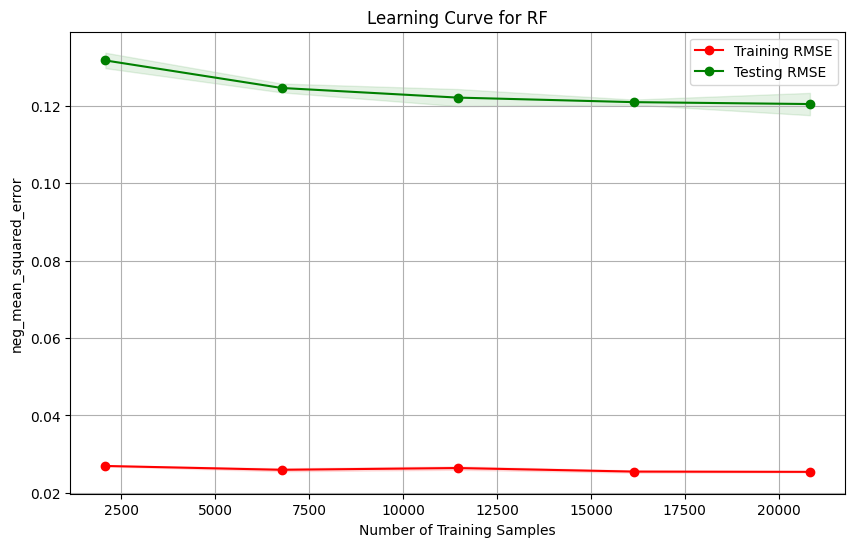

In [49]:
plot_learning_curve(rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for RF")

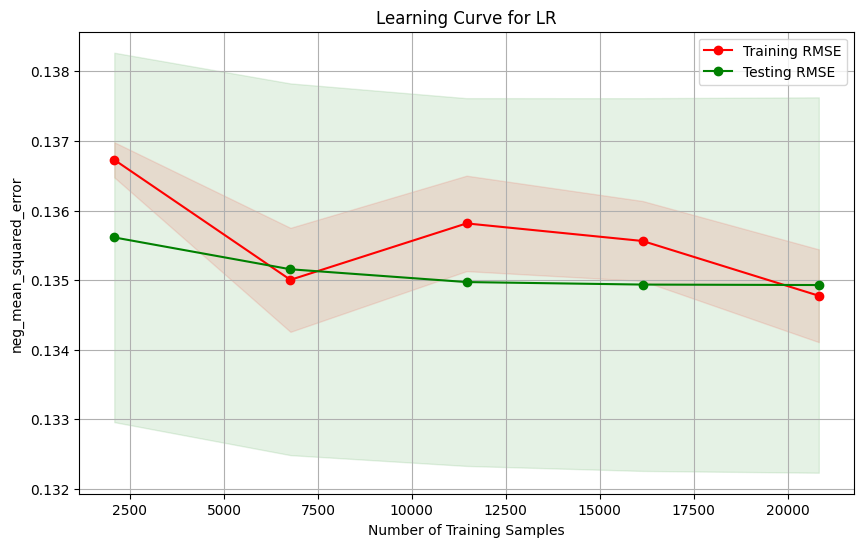

In [50]:
plot_learning_curve(lr_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for LR")

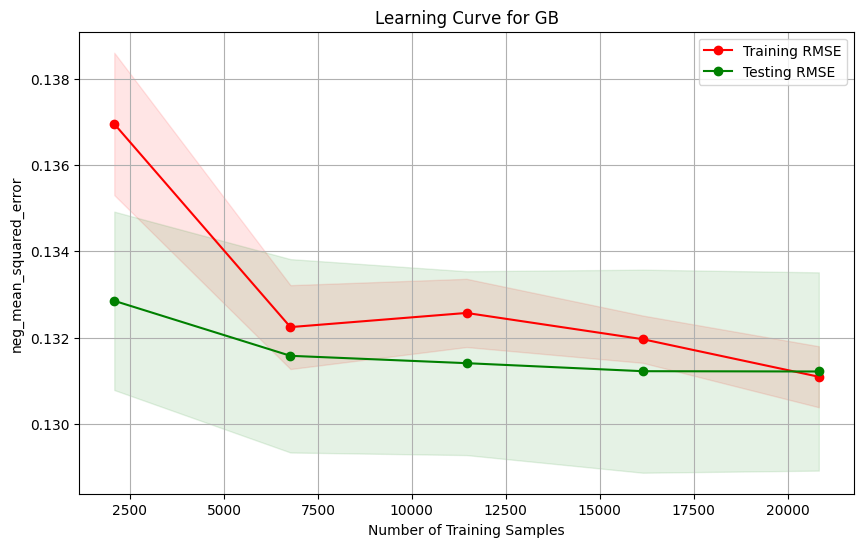

In [51]:
plot_learning_curve(gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for GB")

# Hyperparameter Tuning

## RandomForestRegressor Tuning

In [52]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50]
cv = 3

parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth}

rf_tuned_hp = RandomForestRegressor(random_state = 42)

rf_rand_cv = RandomizedSearchCV(estimator = rf_tuned_hp, param_distributions = parameters, cv = cv, random_state = 42)
rf_rand_cv.fit(X_train,y_train)
rf_rand_cv.best_score_
rf_rand_cv.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20}

In [53]:
rf_best_params = rf_rand_cv.best_params_
rf_reg_tuned = RandomForestRegressor(**rf_best_params)
rf_reg_tuned.fit(X_train, y_train)
pred_rf_tuned = rf_reg_tuned.predict(X_test).round()

In [54]:
Accuracy_rf_tuned = 100*accuracy_score(y_test, pred_rf_tuned)
print(f"The Accuracy using tuned parameter for Random Forest Regression is {Accuracy_rf_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_rf_tuned))
print("\n\nConfusion Matrix:\n")
print(confusion_matrix(y_test,pred_rf_tuned))

The Accuracy using tuned parameter for Random Forest Regression is 86.36363636363636



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4976
           1       0.76      0.62      0.68      1536

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512



Confusion Matrix:

[[4675  301]
 [ 587  949]]


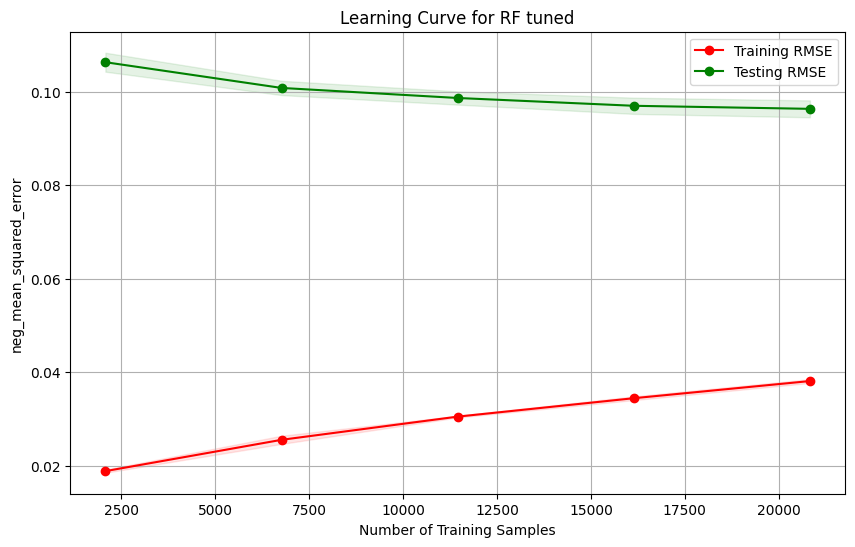

In [55]:
plot_learning_curve(rf_reg_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for RF tuned")

## GradientBoostingRegressor Tuning

In [56]:
n_estimator_gb = [int(x) for x in np.linspace(start  = 50, stop = 140, num = 5)]
learning_rate_gb = [float(x) for x in np.linspace(start = 0.05, stop= 0.15, num = 5)]
max_depth_gb = [int(x) for x in np.linspace(start  = 2, stop = 14, num = 3)]

parameters = {'n_estimators': n_estimator_gb,'learning_rate':learning_rate_gb,'max_depth':max_depth_gb}
gb_tuned_hp = GradientBoostingRegressor(random_state = 42)

gb_rand_cv = RandomizedSearchCV(estimator = gb_tuned_hp, param_distributions = parameters, cv = 3, n_iter=10, random_state = 42)
gb_rand_cv.fit(X_train, y_train)
gb_rand_cv.best_score_
gb_rand_cv.best_params_

{'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1}

In [57]:
gb_best_params = gb_rand_cv.best_params_
gb_reg_tuned = GradientBoostingRegressor(**gb_best_params)
gb_reg_tuned.fit(X_train, y_train)
pred_gb_tuned= gb_reg_tuned.predict(X_test).round()

In [58]:
Accuracy_gb_tuned = 100*accuracy_score(y_test, pred_gb_tuned)
print(f"The Accuracy using tuned parameter for Gradient Boosting is {Accuracy_gb_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_gb_tuned))
print("\n\nConfusion Matrix:\n")
print(confusion_matrix(y_test,pred_gb_tuned))

The Accuracy using tuned parameter for Gradient Boosting is 86.90110565110565



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4976
           1       0.78      0.61      0.69      1536

    accuracy                           0.87      6512
   macro avg       0.84      0.78      0.80      6512
weighted avg       0.86      0.87      0.86      6512



Confusion Matrix:

[[4717  259]
 [ 594  942]]


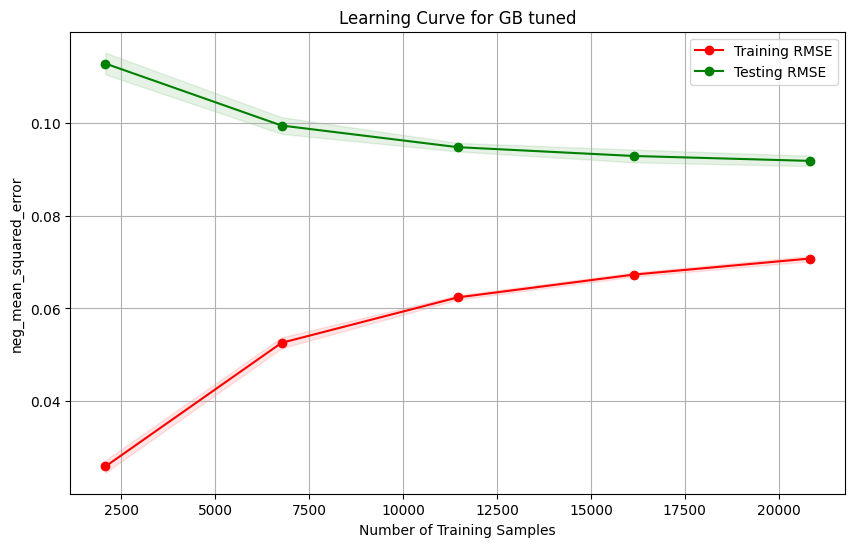

In [59]:
plot_learning_curve(gb_reg_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for GB tuned")

# Conclusion

In [60]:
Results = pd.DataFrame(
    {
        'Algorithms': ['Random Forest', 'Linear regression', 'Gradient Boost', 'Tuned Random Forest', 'Tuned Gradient Boost'],
        'Accuracy': [Accuracy_rf,Accuracy_lr,Accuracy_gb,Accuracy_rf_tuned,Accuracy_gb_tuned]
    }
)

Results = Results.sort_values(by='Accuracy', ascending=False)

Results.head()


Algorithms   Accuracy
4  Tuned Gradient Boost  86.901106
3   Tuned Random Forest  86.363636
0         Random Forest  83.891278
2        Gradient Boost  81.449631
1     Linear regression  80.820025

The best models that have been tried are tuned gradient boost, tuned random forest, random forest, gradient boost, and finally linear regression. Linear regression is not tuned because there are no hyperparameters that need to be adjusted.